<a href="https://colab.research.google.com/github/chipojaya1/Machine-Learning-I/blob/main/Practical%20Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNSC6314 Assignment 1 by Chipo Jaya: G44454879**

## This assignment uses Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

Data is from three months: 2024/02, 2024/03 and 2024/04.

### Getting started

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# cloning github repository to access data
!git clone https://github.com/chipojaya1/Machine-Learning-I.git

Cloning into 'Machine-Learning-I'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 32 (delta 6), reused 0 (delta 0), pack-reused 20 (from 2)
Receiving objects: 100% (32/32), 47.94 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (5/5), done.


In [3]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
sns.set(style='whitegrid')     # Set visual style for seaborn

### Data

In [7]:
# load the data
df_Feb = pd.read_csv('/content/Machine-Learning-I/202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('/content/Machine-Learning-I/202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('/content/Machine-Learning-I/202404-capitalbikeshare-tripdata.csv')

# data merge
df_bike=pd.concat([df_Feb, df_Mar,df_Apr])

In [8]:
# getting to know the data
print(f"Train Data Shape: {df_bike.shape}")
print()

df_bike.info()
print()

df_bike.head()

Train Data Shape: (1245899, 13)

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


### Data cleaning

This research will be focusing on the GWSB Station: '22nd & H St NW'

**Bike Availability: Number of Pickups**

In [15]:
# inspecting the started_at column
df_bike['started_at'].head(10)

,started_at
0,2024-02-01 21:18:50
1,2024-02-06 17:15:33
2,2024-02-26 13:19:42
3,2024-02-02 11:01:22
4,2024-02-25 08:28:18
5,2024-02-24 16:12:24
6,2024-02-23 19:12:38
7,2024-02-15 08:58:20
8,2024-02-29 14:39:10
9,2024-02-08 08:12:24


In [24]:
# converting the 'started_at' column to datetime objects
df_bike['started_at_date'] = pd.to_datetime(df_bike['started_at']).dt.date
df_bike['started_at_date'].head()

,started_at_date
0,2024-02-01
1,2024-02-06
2,2024-02-26
3,2024-02-02
4,2024-02-25


In [19]:
# inspecting start_station_name column
df_bike['start_station_name'].head()

,start_station_name
0,Eckington Pl & Q St NE
1,4th & C St SW
2,North Capitol St & F St NW
3,1st & K St NE
4,Virginia Ave & 25th St NW


In [20]:
# filtering trips starting from location '22nd & H St NW'
PU_trips = df_bike[df_bike['start_station_name'] == '22nd & H St NW']

In [25]:
# grouping by date and counting the trips on that date
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

,started_at_date
started_at_date,
2024-02-01,33
2024-02-02,23
2024-02-03,22
2024-02-04,18
2024-02-05,19
...,...
2024-04-26,33
2024-04-27,18
2024-04-28,36


**Dock Availability: Number of Dropoffs**

In [27]:
# inspecting drop ended_at column
df_bike['ended_at'].head()

,ended_at
0,2024-02-01 21:27:36
1,2024-02-06 17:30:33
2,2024-02-26 13:30:44
3,2024-02-02 11:05:14
4,2024-02-25 08:48:44


In [28]:
# convertin the 'ended_at' column to datetime objects
df_bike['ended_at_date'] = pd.to_datetime(df_bike['ended_at']).dt.date
df_bike['ended_at_date'].head(10)

,ended_at_date
0,2024-02-01
1,2024-02-06
2,2024-02-26
3,2024-02-02
4,2024-02-25
5,2024-02-24
6,2024-02-23
7,2024-02-15
8,2024-02-29
9,2024-02-08


In [30]:
# inspecting the end_station_name column
df_bike['end_station_name'].head()

,end_station_name
0,5th & K St NW
1,NaN
2,NaN
3,NaN
4,NaN


In [31]:
# filtering trips ending at destination '22nd & H St NW'
DO_trips = df_bike[df_bike['end_station_name'] == '22nd & H St NW']
DO_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
1398,3E6F60E28CD53F29,classic_bike,2024-02-17 16:08:24,2024-02-17 16:13:41,17th & G St NW,31277.0,22nd & H St NW,31127.0,38.898301,-77.039643,38.898925,-77.048852,member,2024-02-17,2024-02-17
1403,F1B9FCA75E7A4ED8,classic_bike,2024-02-17 00:29:17,2024-02-17 00:41:14,7th & F St NW / National Portrait Gallery,31232.0,22nd & H St NW,31127.0,38.897283,-77.022191,38.898925,-77.048852,member,2024-02-17,2024-02-17
1409,9324D853D41E09CC,electric_bike,2024-02-02 13:33:24,2024-02-02 13:46:29,37th & O St NW / Georgetown University,31236.0,22nd & H St NW,31127.0,38.907937,-77.071677,38.898925,-77.048852,casual,2024-02-02,2024-02-02
1418,D41D95AE5813E767,classic_bike,2024-02-02 09:03:42,2024-02-02 09:40:01,Eads St & 15th St S,31000.0,22nd & H St NW,31127.0,38.859751,-77.053235,38.898925,-77.048852,member,2024-02-02,2024-02-02
1431,0A0795A6A8EF463E,classic_bike,2024-02-08 13:46:46,2024-02-08 14:05:46,Wilson Blvd & N Edgewood St,31019.0,22nd & H St NW,31127.0,38.889396,-77.091862,38.898925,-77.048852,member,2024-02-08,2024-02-08


In [32]:
# grouping by date and count the number of trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

,ended_at_date
ended_at_date,
2024-02-01,33
2024-02-02,25
2024-02-03,20
2024-02-04,19
2024-02-05,23
...,...
2024-04-26,39
2024-04-27,24
2024-04-28,28


**Merging Pick Up and Drop Off tables**
- For each day, we look at the numbers of pickups and dropoffs

In [37]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.
PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'
PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts


,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


### Visualizing the pickups and dropoffs

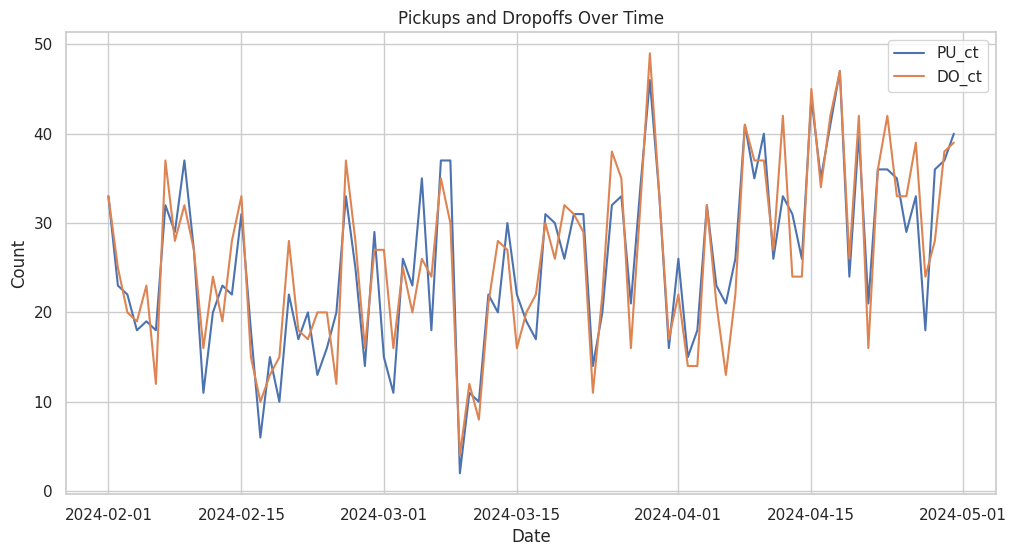

In [38]:
# plot line chart showing the PU_count and DO_count over time
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(PU_DO_counts.index, PU_DO_counts['PU_ct'], label='PU_ct')
plt.plot(PU_DO_counts.index, PU_DO_counts['DO_ct'], label='DO_ct')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend()
plt.grid(True)

plt.show()

# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [ ]:
# Loading the weather data
df_weather = pd.read_csv('DC_weather_2024.csv')

# Inspecting the dataframe
df_weather.head()

In [ ]:
# Checking info of columns
df_weather.info()

## Drop variables of your choice

In [ ]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [ ]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Display the merged dataframe
merged_df

In [ ]:
import seaborn as sns
sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'})) # pairplot for PU_ct

# Prepare training and test data

In [ ]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

# **Assignment 1: Regression Models**

## Task 1: Train a linear regression model with a single feature ('temp') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [ ]:
# Preparing the training and test data
y = merged_df['PU_ct']
X = merged_df[['temp']]
X

In [ ]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [ ]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predicting and calculating MSE:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

In [ ]:
# Storing MSE for Task 1 features: temp
train_mse_task1 = train_mse
test_mse_task1 = test_mse

## Task 2: Train a linear regression model with two feature ('temp' and 'precip') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [ ]:
# Preparing the training and test data
y = merged_df['PU_ct']
X = merged_df[['temp', 'precip']]
X

In [ ]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [ ]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predicting and calculating MSE:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

In [ ]:
# Storing MSE for Task 2 features: temp + precip
train_mse_task2 = train_mse
test_mse_task2 = test_mse

## Task 3: Train a linear regression model with features ('temp','precip','windspeed') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [ ]:
# Preparing the training and test data
y = merged_df['PU_ct']
X = merged_df[['temp', 'precip', 'windspeed']]
X

In [ ]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [ ]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predicting and calculating MSE:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

In [ ]:
# Storing MSE for Task 3 featuers: temp + precip + windspeed
train_mse_task3 = train_mse
test_mse_task3 = test_mse

## Task 4: Train a linear regression model with features ('temp','precip','windspeed','uvindex') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [ ]:
# Preparing the training and test data
y = merged_df['PU_ct']
X = merged_df[['temp', 'precip', 'windspeed', 'uvindex']]
X

In [ ]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [ ]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predicting and calculating MSE:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

In [ ]:
# Storing MSE for Task 4 features: temp + precip + windspeed + uvindex
train_mse_task4 = train_mse
test_mse_task4 = test_mse

## Task 5: Train a linear regression model with features ('temp','precip','windspeed','uvindex','icon') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [ ]:
# Preparing the training and test data
y = merged_df['PU_ct']
X = pd.get_dummies(merged_df[['temp', 'precip', 'windspeed', 'uvindex', 'icon']], columns=['icon'], drop_first=True)
X

In [ ]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [ ]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predicting and calculating MSE:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

In [ ]:
# Storing MSE for Task 5 features: temp + precip + windspeed + uvindex + icon_dummies
train_mse_task5 = train_mse
test_mse_task5 = test_mse

## Task 6: Based on the previous results, plot the changes in training and test MSEs as more features are added to the linear regression model. [10 pts]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# MSE values from the Tasks 1–5
mse_data = {
    'Features': [
        'temp',
        'temp,precip',
        'temp,precip,windspeed',
        'temp,precip,windspeed,uvindex',
        'temp,precip,windspeed,uvindex,icon_dummies'
    ],
    'Train_MSE': [train_mse_task1, train_mse_task2, train_mse_task3, train_mse_task4, train_mse_task5],
    'Test_MSE': [test_mse_task1, test_mse_task2, test_mse_task3, test_mse_task4, test_mse_task5]
}
# DataFrame storing the MSE values
mse_df = pd.DataFrame(mse_data)

In [ ]:
# Plotting the train and test MSE values
plt.figure(figsize=(8, 5))
plt.plot(mse_df['Features'], mse_df['Train_MSE'], label='Train MSE', marker='o')
plt.plot(mse_df['Features'], mse_df['Test_MSE'], label='Test MSE', marker='s')
plt.xlabel('Features')
plt.ylabel('MSE')
plt.title('Training and Test MSE vs. Features')
plt.legend()
plt.grid(True)
plt.xticks(rotation=60)  # Rotating x-axis labels for better readability
plt.show()

## Task 7: Based on the above plot, identify the best combination of features for PU_ct prediction in linear regression. [10 pts]

## Task 8: Conduct Task 1-7 again for DO_ct prediction. [30 pts]

#Reference
##### <font color="red">"DeepSeek AI (Version 1.0, developed by DeepSeek AI, accessed January 28, 2025)" was consulted during the research process.</font>
